Checking the model with superclass hierarchy with no augmentation. (It was manually switched off in the .json file)

In [9]:
cd ..

/afs/inf.ed.ac.uk/user/s13/s1320903/Neuroglycerin/neukrill-net-work


Run the modification of check_test_score.py so that it can work with superclass representation.

In [1]:
import numpy as np
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import sklearn.metrics
import argparse
import os
import pylearn2.config.yaml_parse

Using gpu device 1: Tesla K40c


Check which core is free.

In [6]:
%env THEANO_FLAGS = 'device=gpu3,floatX=float32,base_compiledir=~/.theano/stonesoup3'

env: THEANO_FLAGS='device=gpu3,floatX=float32,base_compiledir=~/.theano/stonesoup3'


In [31]:
verbose = False
augment = 1
settings = neukrill_net.utils.Settings("settings.json")

Give the path to .json.

In [14]:
run_settings = neukrill_net.utils.load_run_settings('run_settings/alexnet_based_extra_convlayer_with_superclasses.json', 
            settings, force=True)

In [49]:
model = pylearn2.utils.serial.load(run_settings['pickle abspath'])

In [50]:
# format the YAML
yaml_string = neukrill_net.utils.format_yaml(run_settings, settings)
# load proxied objects
proxied = pylearn2.config.yaml_parse.load(yaml_string, instantiate=False)
# pull out proxied dataset
proxdata = proxied.keywords['dataset']
# force loading of dataset and switch to test dataset
proxdata.keywords['force'] = True
proxdata.keywords['training_set_mode'] = 'test'
proxdata.keywords['verbose'] = False
# then instantiate the dataset
dataset = pylearn2.config.yaml_parse._instantiate(proxdata)

(3089, 188)


In [51]:
if hasattr(dataset.X, 'shape'):
    N_examples = dataset.X.shape[0]
else:
    N_examples = len(dataset.X)
batch_size = 500
while N_examples%batch_size != 0:
    batch_size += 1
n_batches = int(N_examples/batch_size)

In [52]:
model.set_batch_size(batch_size)
X = model.get_input_space().make_batch_theano()
Y = model.fprop(X)
f = theano.function([X],Y)

In [53]:
import neukrill_net.encoding as enc
hier = enc.get_hierarchy()
lengths = sum([len(array) for array in hier])
y = np.zeros((N_examples*augment,lengths))
# get the data specs from the cost function using the model
pcost = proxied.keywords['algorithm'].keywords['cost']
cost = pylearn2.config.yaml_parse._instantiate(pcost)
data_specs = cost.get_data_specs(model)

In [54]:
i = 0 
for _ in range(augment):
    # make sequential iterator
    iterator = dataset.iterator(batch_size=batch_size,num_batches=n_batches,
                        mode='even_sequential', data_specs=data_specs)
    for batch in iterator:
        if verbose:
            print("    Batch {0} of {1}".format(i+1,n_batches*augment))
        y[i*batch_size:(i+1)*batch_size,:] = f(batch[0])
        i += 1

Best .pkl scores as:

In [47]:
logloss = sklearn.metrics.log_loss(dataset.y[:, :len(settings.classes)], y[:, :len(settings.classes)])
print("Log loss: {0}".format(logloss))

Log loss: 1.49980241373


Recent .pkl scores as: (rerun relevant cells with a different path)

In [55]:
logloss = sklearn.metrics.log_loss(dataset.y[:, :len(settings.classes)], y[:, :len(settings.classes)])
print("Log loss: {0}".format(logloss))

Log loss: 1.51845664465


In [62]:
%env THEANO_FLAGS = device=gpu2,floatX=float32,base_compiledir=~/.theano/stonesoup2

env: THEANO_FLAGS=device=gpu2,floatX=float32,base_compiledir=~/.theano/stonesoup2


In [63]:
%env

{'ASPELL_CONF': 'master british',
 'BASH': '/bin/bash',
 'BASH_FUNC__command_not_found()': '() {  echo "bash: $1: command not found" 1>&2\n}',
 'BASH_FUNC_colloq()': '() {  more /usr/local/alert/misc/coll\n}',
 'BASH_FUNC_command_not_found_handle()': '() {  unset command_not_found_handle;\n if [[ "$IFS" != \' \t\n\' ]]; then\n _command_not_found $*;\n fi;\n function dbg () \n { \n [[ -n $CRICHTON_DEBUG ]] && echo $1 1>&2\n };\n SORT="/usr/bin/_SortBashRC";\n PATTERN=\'[0-9][0-9][0-9].*\';\n if [[ -n $CRICHTON_DEBUG ]]; then\n modules=$($SORT $CRICHTON_SYS/$PATTERN $CRICHTON_USR/$PATTERN);\n else\n modules=$($SORT $CRICHTON_SYS/$PATTERN $CRICHTON_USR/$PATTERN 2>&-);\n fi;\n dbg "- Found $(/bin/echo $modules | /usr/bin/wc -w 2>&-) modules.";\n for mod in ${modules} _command_not_found;\n do\n dbg "-- $(/bin/basename $mod 2>&-)";\n CRICHTON_SYS=$CRICHTON_SYS CRICHTON_USR=$CRICHTON_USR "$mod" $*;\n exit=$?;\n dbg "[exit $exit]";\n [[ $exit == 255 ]] && { \n _command_not_found $1;\n break\n 

Check the same model with 8 augmentation.

In [64]:
import numpy as np
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import sklearn.metrics
import argparse
import os
import pylearn2.config.yaml_parse

verbose = False
augment = 1
settings = neukrill_net.utils.Settings("settings.json")

run_settings = neukrill_net.utils.load_run_settings('run_settings/alexnet_based_extra_convlayer_with_superclasses_aug.json', 
            settings, force=True)

model = pylearn2.utils.serial.load(run_settings['pickle abspath'])

# format the YAML
yaml_string = neukrill_net.utils.format_yaml(run_settings, settings)
# load proxied objects
proxied = pylearn2.config.yaml_parse.load(yaml_string, instantiate=False)
# pull out proxied dataset
proxdata = proxied.keywords['dataset']
# force loading of dataset and switch to test dataset
proxdata.keywords['force'] = True
proxdata.keywords['training_set_mode'] = 'test'
proxdata.keywords['verbose'] = False
# then instantiate the dataset
dataset = pylearn2.config.yaml_parse._instantiate(proxdata)

if hasattr(dataset.X, 'shape'):
    N_examples = dataset.X.shape[0]
else:
    N_examples = len(dataset.X)
batch_size = 500
while N_examples%batch_size != 0:
    batch_size += 1
n_batches = int(N_examples/batch_size)

model.set_batch_size(batch_size)
X = model.get_input_space().make_batch_theano()
Y = model.fprop(X)
f = theano.function([X],Y)

import neukrill_net.encoding as enc
hier = enc.get_hierarchy()
lengths = sum([len(array) for array in hier])
y = np.zeros((N_examples*augment,lengths))
# get the data specs from the cost function using the model
pcost = proxied.keywords['algorithm'].keywords['cost']
cost = pylearn2.config.yaml_parse._instantiate(pcost)
data_specs = cost.get_data_specs(model)

i = 0 
for _ in range(augment):
    # make sequential iterator
    iterator = dataset.iterator(batch_size=batch_size,num_batches=n_batches,
                        mode='even_sequential', data_specs=data_specs)
    for batch in iterator:
        if verbose:
            print("    Batch {0} of {1}".format(i+1,n_batches*augment))
        y[i*batch_size:(i+1)*batch_size,:] = f(batch[0])
        i += 1

(24712, 188)


Best .pkl scored as:

In [65]:
logloss = sklearn.metrics.log_loss(dataset.y[:, :len(settings.classes)], y[:, :len(settings.classes)])
print("Log loss: {0}".format(logloss))

Log loss: 2.02097272697


Strange. Not as good as we hoped. Is there a problem with augmentation?

Let's plot the nll.

In [67]:
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#import holoviews as hl
#load_ext holoviews.ipython
import sklearn.metrics

In [73]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/alexnet_based_extra_convlayer_with_superclasses_aug_recent.pkl")

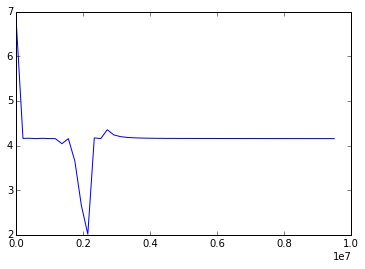

In [75]:
channel = m.monitor.channels["valid_y_y_1_nll"]
plt.plot(channel.example_record,channel.val_record)

Looks like it's pretty stable at 4 and had this random strange glitch which gave the best result.

Look at the best pkl of the none-aug model again: (just to confirm that it was indeed good)

In [76]:
import numpy as np
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import sklearn.metrics
import argparse
import os
import pylearn2.config.yaml_parse

verbose = False
augment = 1
settings = neukrill_net.utils.Settings("settings.json")

run_settings = neukrill_net.utils.load_run_settings('run_settings/alexnet_based_extra_convlayer_with_superclasses.json', 
            settings, force=True)

model = pylearn2.utils.serial.load(run_settings['pickle abspath'])

# format the YAML
yaml_string = neukrill_net.utils.format_yaml(run_settings, settings)
# load proxied objects
proxied = pylearn2.config.yaml_parse.load(yaml_string, instantiate=False)
# pull out proxied dataset
proxdata = proxied.keywords['dataset']
# force loading of dataset and switch to test dataset
proxdata.keywords['force'] = True
proxdata.keywords['training_set_mode'] = 'test'
proxdata.keywords['verbose'] = False
# then instantiate the dataset
dataset = pylearn2.config.yaml_parse._instantiate(proxdata)

if hasattr(dataset.X, 'shape'):
    N_examples = dataset.X.shape[0]
else:
    N_examples = len(dataset.X)
batch_size = 500
while N_examples%batch_size != 0:
    batch_size += 1
n_batches = int(N_examples/batch_size)

model.set_batch_size(batch_size)
X = model.get_input_space().make_batch_theano()
Y = model.fprop(X)
f = theano.function([X],Y)

import neukrill_net.encoding as enc
hier = enc.get_hierarchy()
lengths = sum([len(array) for array in hier])
y = np.zeros((N_examples*augment,lengths))
# get the data specs from the cost function using the model
pcost = proxied.keywords['algorithm'].keywords['cost']
cost = pylearn2.config.yaml_parse._instantiate(pcost)
data_specs = cost.get_data_specs(model)

i = 0 
for _ in range(augment):
    # make sequential iterator
    iterator = dataset.iterator(batch_size=batch_size,num_batches=n_batches,
                        mode='even_sequential', data_specs=data_specs)
    for batch in iterator:
        if verbose:
            print("    Batch {0} of {1}".format(i+1,n_batches*augment))
        y[i*batch_size:(i+1)*batch_size,:] = f(batch[0])
        i += 1

(3089, 188)


In [77]:
logloss = sklearn.metrics.log_loss(dataset.y[:, :len(settings.classes)], y[:, :len(settings.classes)])
print("Log loss: {0}".format(logloss))

Log loss: 1.49980241373


It was. Annoying. Let's plot the nll too:

In [78]:
m = pylearn2.utils.serial.load(
    "/disk/scratch/neuroglycerin/models/alexnet_based_extra_convlayer_with_superclasses.pkl")

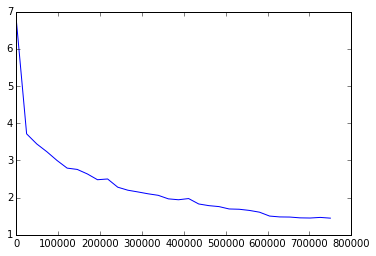

In [79]:
channel = m.monitor.channels["valid_y_y_1_nll"]
plt.plot(channel.example_record,channel.val_record)

That's way nicer. Looks like it was working fine.

Now we are going to modify the dense dataset class so that for each image, the same exact image is produced. This was we will mimic the augmentation but effectively will run on exactly the same dataset. We can use the same .json and .yaml files too.